In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from plotly.offline import plot


In [46]:
# Charger les données dans un DataFrame
ds = pd.read_csv("/content/drive/MyDrive/ekinox/data/student_data.csv", delimiter=",")

In [59]:
ds.shape

(357, 34)

In [47]:
# Séparer les features catégorielles et numériques
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
                        'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
                        'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'failures']
numerical_features = ['age', 'absences']
# on va considérer ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'] comme des variables catégorielles 
#et failures comme numérique pour simplifier même si ce sont des catégories en réalité
target = "FinalGrade"
feat = categorical_features+numerical_features

In [48]:
# Conversion des variables catégorielles en numériques
le = LabelEncoder()

# appliquer le LabelEncoder à toutes les colonnes catégorielles
ds[categorical_features] = ds[categorical_features].apply(lambda col: le.fit_transform(col))

In [49]:
# Normaliser les données numériques (et catégorielles devenues numériques)
scaler = StandardScaler()
ds[feat]= scaler.fit_transform(ds[feat])

In [50]:
data = ds[feat]
data

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,studytime,famrel,freetime,goout,Dalc,Walc,health,failures,age,absences
0,-0.365148,-0.964225,0.528744,-0.654217,-2.855494,-1.805311,2.007673,-1.071848,0.290327,2.477902,...,-0.050578,0.050671,-0.244014,0.828056,-0.539734,-1.028900,-0.391969,-0.405047,1.061630,-0.038713
1,-0.365148,-0.964225,0.528744,-0.654217,0.350202,-1.805311,-0.326983,-1.071848,-1.594161,-0.403567,...,-0.050578,1.181279,-0.244014,-0.090006,-0.539734,-1.028900,-0.391969,-0.405047,0.272043,-0.283327
2,-0.365148,-0.964225,0.528744,1.528545,0.350202,-1.805311,-0.326983,0.577504,0.290327,2.477902,...,-0.050578,0.050671,-0.244014,-1.008069,0.548883,0.517699,-0.391969,4.067169,-1.307132,0.450515
3,-0.365148,-0.964225,0.528744,-0.654217,0.350202,-0.983250,0.840345,-0.247172,0.290327,-0.403567,...,1.153183,-1.079936,-1.233933,-1.008069,-0.539734,-1.028900,1.035917,-0.405047,-1.307132,-0.527941
4,-0.365148,-0.964225,0.528744,-0.654217,0.350202,-0.161189,-0.326983,-0.247172,-1.594161,-0.403567,...,-0.050578,0.050671,-0.244014,-1.008069,-0.539734,-0.255601,1.035917,-0.405047,-0.517545,-0.283327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2.738613,1.037102,0.528744,1.528545,-2.855494,0.660873,0.840345,-1.071848,2.174816,-0.403567,...,-0.050578,1.181279,1.735824,0.828056,2.726117,2.064299,0.321974,2.576431,2.640805,0.572822
353,2.738613,1.037102,0.528744,1.528545,0.350202,0.660873,0.840345,-1.071848,0.290327,-0.403567,...,-1.254340,-2.210544,0.745905,1.746119,1.637500,1.290999,-1.105912,-0.405047,0.272043,-0.405634
354,2.738613,1.037102,-1.891276,-0.654217,0.350202,-0.161189,-0.326983,-1.071848,2.174816,-0.403567,...,-1.254340,1.181279,1.735824,-0.090006,1.637500,0.517699,-0.391969,4.067169,3.430392,-0.405634
355,2.738613,1.037102,-1.891276,1.528545,0.350202,0.660873,-0.326983,-1.071848,0.290327,-0.403567,...,-1.254340,0.050671,0.745905,-1.926131,1.637500,1.290999,1.035917,-0.405047,1.061630,-0.772555


In [71]:
# Centrage et mise à l'échelle des données
data_scaled = (data - data.mean()) / data.std()

# Création d'une instance de PCA avec 2 composantes principales
pca = PCA(n_components=2)

# Application de l'analyse en composantes principales aux données
pca.fit(data_scaled)

# variance sur les deux premières composantes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Affichage des charges des variables
loadings_df = pd.DataFrame(loadings, index=feat, columns=['PC1', 'PC2'])
print(loadings_df)

# Affichage des corrélations des variables avec les composantes principales
corr_df = pd.DataFrame(pca.transform(data_scaled), columns=['PC1', 'PC2'])
corr_df = pd.concat([corr_df, ds['FinalGrade']], axis=1)
corr_matrix = corr_df.corr()
print(corr_matrix['FinalGrade'])

                 PC1       PC2
school      0.435439 -0.042005
sex         0.230171  0.479886
address    -0.325135  0.124787
famsize     0.112602  0.108309
Pstatus     0.042587 -0.090198
Mjob       -0.297128  0.525177
Fjob       -0.046077  0.311145
reason     -0.252414 -0.054525
guardian    0.182458 -0.050390
schoolsup  -0.161302 -0.151699
famsup     -0.340367  0.062537
paid       -0.279402  0.123834
activities -0.201409  0.174915
nursery    -0.327850  0.092375
higher     -0.433852  0.053945
internet   -0.261568  0.313673
romantic    0.063372  0.074399
Medu       -0.543985  0.530114
Fedu       -0.509904  0.446512
traveltime  0.411129 -0.033199
studytime  -0.353978 -0.306485
famrel     -0.043752  0.006547
freetime    0.186699  0.388264
goout       0.229246  0.478390
Dalc        0.448493  0.567135
Walc        0.489577  0.567575
health      0.079641  0.172504
failures    0.526452 -0.005390
age         0.513718 -0.032650
absences    0.121848  0.135564
PC1          -0.279198
PC2           0.

In [54]:
# Tri des coefficients de la première composante principale en valeur absolue
loadings_abs = np.abs(loadings_df['PC1'])
loadings_abs_sorted = loadings_abs.sort_values(ascending=False)

# Affichage des 10 variables les plus impactantes
print(loadings_abs_sorted[:10])

Medu          0.543985
failures      0.526452
age           0.513718
Fedu          0.509904
Walc          0.489577
Dalc          0.448493
school        0.435439
higher        0.433852
traveltime    0.411129
studytime     0.353978
Name: PC1, dtype: float64


- La PC1 est fortement influencée par les variables Dalc et Walc, qui sont les deux variables les plus corrélées avec cette composante. 
Cela suggère que la PC1 pourrait être interprétée comme une mesure de la consommation d'alcool des étudiants.

> Bloc en retrait


- La PC2 est fortement influencée par les variables goout et failures
Cela suggère que la PC2 pourrait être interprétée comme une mesure de l'implication sociale et de la réussite scolaire des étudiants.
- La variable FinalGrade est fortement corrélée avec les deux composantes, ce qui suggère que ces deux dimensions sont importantes pour expliquer la variance de la note finale des étudiants.
- Medu et Fedu sont fortement corrélées entre elles --> pourraient être combinées en une seule variable représentant le niveau d'éducation des parents.
- Les variables studytime et freetime ont des contributions opposées à la PC1, ce qui suggère que ces deux variables sont négativement corrélées avec la consommation d'alcool des étudiants. 
- De même, la variable absences a une contribution opposée à la PC2, ce qui suggère qu'elle est négativement corrélée avec l'implication sociale et la réussite scolaire des étudiants.

En combinant avec les résultats précédents, qui étaient cohérents par le fait que traveltime, Dalc, absences, failures et studytime semblaient être les variables les plus impactantes, on peut partir du principe que la complexité d'accompagner un élève serait aussi dépendante des variables mentionnées.

### Clusters

In [113]:
# Set the optimal number of clusters based on the elbow method
k = 3

# Perform KMeans clustering with the optimal k value
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(corr_df[['PC1', 'PC2']])

# Assign each data point to a cluster
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Add the cluster labels to the original data
corr_df['Cluster'] = labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [74]:
corr_df

,PC1,PC2,FinalGrade,Cluster
0,-0.231946,-0.920853,6,2
1,0.553462,-2.708228,6,2
2,1.539214,-1.985153,10,1
3,-2.398977,-1.079210,15,2
4,-1.357012,-1.119092,10,2
...,...,...,...,...
352,4.334215,2.560494,9,1
353,3.458129,2.010700,16,1
354,6.599840,-0.597948,7,1
355,3.774910,0.901909,10,1


In [98]:
import plotly.express as px

def plot_clusters(data, centers, labels):
    # assign a color to each cluster label
    label_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
    colors = [label_colors[label % len(label_colors)] for label in labels]

    # create a scatter plot with hover information
    fig = px.scatter(data, x='PC1', y='PC2', color=colors, hover_data={'FinalGrade': True}, symbol='Cluster', size_max=10, opacity=0.5)

  
    # set the plot title and axis labels
    fig.update_layout(title='Student Clusters', xaxis_title='Feature 1', yaxis_title='Feature 2')

    # show the plot
    fig.show()

plot_clusters(corr_df, kmeans.cluster_centers_, kmeans.labels_)

In [118]:
def plot_clusters(data, centers, labels):
    # assign a color to each cluster label
    label_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
    colors = [label_colors[label % len(label_colors)] for label in labels]

    # create a scatter plot with hover information
    fig = px.scatter(data, x='PC1', y='PC2', color=colors, hover_data={'FinalGrade': True, 'colors': colors}, symbol='Cluster', size_max=10, opacity=0.5)
    fig.update_traces(customdata=np.vstack((data['FinalGrade'], colors)).T, hovertemplate='FinalGrade: %{customdata[0]}<br>Cluster color: %{customdata[1]}')

    # set the plot title and axis labels
    fig.update_layout(title='Student Clusters', xaxis_title='Feature 1', yaxis_title='Feature 2')

    # show the plot
    fig.show()
    plot(fig, filename='/content/drive/MyDrive/ekinox/notebooks/02_models/plot_cluster.html', auto_open=False)

plot_clusters(corr_df, kmeans.cluster_centers_, kmeans.labels_)

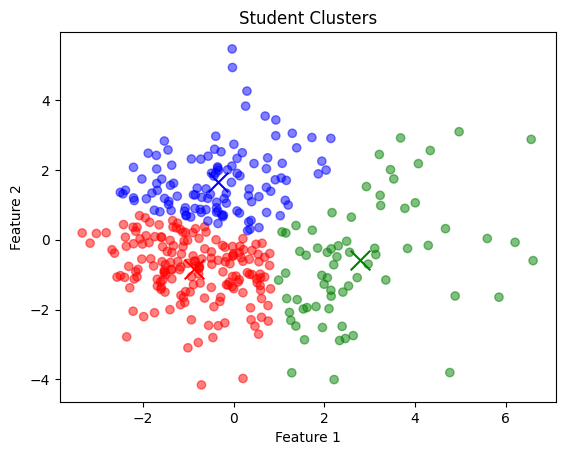

<Figure size 640x480 with 0 Axes>

In [57]:
def plot_clusters(data, centers, labels):
    # assign a color to each cluster label
    label_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    colors = [label_colors[label % len(label_colors)] for label in labels]

    # plot the data points
    plt.scatter(corr_df['PC1'], corr_df['PC2'], c=colors, alpha=0.5)

    # plot the cluster centers
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], marker='x', color=label_colors[i % len(label_colors)], s=200)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Student Clusters')
    plt.show()

plot_clusters(corr_df, kmeans.cluster_centers_, kmeans.labels_)

In [ ]:
# # Suppose your new observation is stored in a variable called "new_observation"
# # Calculate the principal component scores for the new observation
# new_obs_pc = pca.transform(new_observation.reshape(1, -1))

# # Create a DataFrame for the new observation
# new_obs_df = pd.DataFrame({'PC1': new_obs_pc[0, 0], 'PC2': new_obs_pc[0, 1], 'Cluster': -1}, index=[corr_df.index[-1]+1])

# # Add the new observation to the original DataFrame
# corr_df = pd.concat([corr_df, new_obs_df])

# # Assign the new observation to a cluster using the KMeans model
# new_obs_cluster = kmeans.predict(new_obs_pc)
# corr_df.loc[corr_df.index[-1], 'Cluster'] = new_obs_cluster

In [ ]:
# save the dataframe to a csv file
corr_df.to_csv('/content/drive/MyDrive/ekinox/notebooks/01_exploration/composantes_principales.csv', index=False)